In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

In [271]:
import time
import os

In [219]:
df = pd.read_csv("C:/personalworkspace/innomatics/flipkart_review_sentiment_analysis/webapp/reviews_badminton.csv")

In [220]:
df.shape

(8518, 8)

In [221]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [222]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [224]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [225]:
df.dropna(axis=0,inplace=True)

In [226]:
df.isnull().sum()

Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
dtype: int64

In [227]:
df['Ratings'].unique()

array([4, 1, 5, 2, 3], dtype=int64)

In [228]:
df["Ratings"].value_counts(normalize=True)

Ratings
5    0.599401
4    0.207039
1    0.085860
3    0.071758
2    0.035942
Name: proportion, dtype: float64

<Axes: xlabel='Ratings', ylabel='count'>

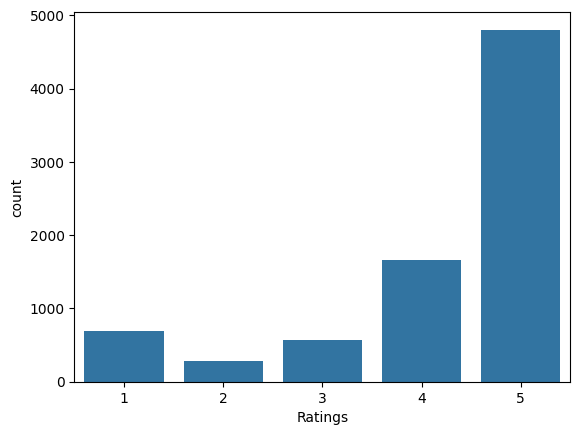

In [229]:
sns.countplot(x='Ratings',data=df)

In [230]:
def replace_ratings(value):
    if value == 1 or value == 2 or value==3:
        return 'negative'
    else :
        return 'positive'
    
    return value
df['Ratings'] = df['Ratings'].apply(replace_ratings)

In [231]:
df["Ratings"].unique()

array(['positive', 'negative'], dtype=object)

In [232]:
df['Ratings'] = df['Ratings'].map({'positive': 1, 'negative': 0})

In [233]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,1


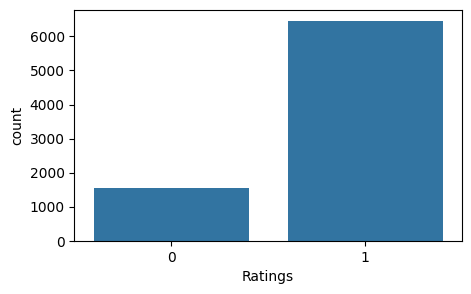

In [234]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3)) 
sns.countplot(x='Ratings', data=df)
plt.show()

In [235]:
# Remove 'READ MORE' from 'Review' column
df['Review text'] = df['Review text'].str.replace('READ MORE', '')

In [236]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",1
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,0
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,1
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,1


## Identify Input and Output

In [237]:
X=df[['Review text']]
y=df['Ratings']

## Split the data into train and test

In [238]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6009, 1) (6009,)
(2004, 1) (2004,)


In [239]:
stemmer=PorterStemmer()

In [240]:
lemmatizer=WordNetLemmatizer()

## Data Preprocessing and Cleaning

In [241]:
# Define preprocess function
def preprocess(text):
    sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    #lower case
    sentence = sentence.lower()
    # tokenize
    tokens = sentence.split()
    # remove stopwords
    c_tokens = [token for token in tokens if token not in stopwords.words("english")]
    # lemmatization
    c_tokens = [lemmatizer.lemmatize(token) for token in c_tokens]
    return pd.Series(' '.join(c_tokens))

### Text Cleaning on train data

In [242]:
X_train.head()

,Review text
6808,i can't rate it. its too High price than offli...
8262,Shuttle is v Gud at v nice price. V durable
4446,Good quality original shuttle
4366,Good...
4376,Best experience


In [243]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [244]:
X_train_tran= X_train['Review text'].progress_apply(lambda x: preprocess(x))

X_train_tran.head()

100%|██████████| 6009/6009 [00:04<00:00, 1494.76it/s]


,0
6808,rate high price offline
8262,shuttle v gud v nice price v durable
4446,good quality original shuttle
4366,good
4376,best experience


In [245]:
X_train_tran.columns = ['Clean_reviewtext']

X_train_tran.head()

,Clean_reviewtext
6808,rate high price offline
8262,shuttle v gud v nice price v durable
4446,good quality original shuttle
4366,good
4376,best experience


In [246]:
type(X_train_tran)

pandas.core.frame.DataFrame

In [247]:
X_train_tran

,Clean_reviewtext
6808,rate high price offline
8262,shuttle v gud v nice price v durable
4446,good quality original shuttle
4366,good
4376,best experience
...,...
8406,product good got best price fk
5652,good
4440,super
254,love really guudas well fantastic delivery ear...


In [248]:
X_train_tran.shape

(6009, 1)

In [249]:
X_train_tran=X_train_tran.squeeze()

### Text Cleaning on test data

## Auto Logging All Experiment Runs using MLFlow

In [290]:
import mlflow

mlflow.set_experiment("reviews_sentiment_analysis")

<Experiment: artifact_location='file:///c:/personalworkspace/innomatics/flipkart_review_sentiment_analysis/webapp/mlruns/241260854724878944', creation_time=1711520843441, experiment_id='241260854724878944', last_update_time=1711520843441, lifecycle_stage='active', name='reviews_sentiment_analysis', tags={}>

In [291]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from joblib import Memory

In [292]:
import warnings

warnings.filterwarnings('ignore')

In [294]:
pipelines = {
    'knn' : Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ]), 
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'classifier__alpha' : [1, 10]
        }
    ]
}

In [ ]:
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train_tran, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test_tran, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

In [295]:
dev = "chinnakrishna"
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )

    # Fit
    start_fit_time = time.time()
    grid_search.fit(X_train_tran, y_train)
    end_fit_time = time.time()

    # Predict
    start_predict_time = time.time()
    y_pred = grid_search.predict(X_test_tran)
    end_predict_time = time.time()

    # Saving the best model
    joblib.dump(grid_search.best_estimator_, f'best_models/{algo}.pkl')
    model_size = os.path.getsize(f'best_models/{algo}.pkl')

    # Pring Log
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test_tran, y_test))
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)
    
    print()

    # Start the experiment run
    with mlflow.start_run() as run:
        # Log tags with mlflow.set_tag()
        mlflow.set_tag("developer", dev)

        # Log Parameters with mlflow.log_param()
        mlflow.log_param("algorithm", algo)
        mlflow.log_param("hyperparameter_grid", param_grids[algo])
        mlflow.log_param("best_hyperparameter", grid_search.best_params_)

        # Log Metrics with mlflow.log_metric()
        mlflow.log_metric("train_score", grid_search.best_score_)
        mlflow.log_metric("test_score", grid_search.score(X_test_tran, y_test))
        mlflow.log_metric("fit_time", end_fit_time - start_fit_time)
        mlflow.log_metric("predict_time", end_predict_time - start_predict_time)
        mlflow.log_metric("model_size", model_size)

        # Log Model using mlflow.sklearn.log_model()
        mlflow.sklearn.log_model(grid_search.best_estimator_, f"{algo}_model")

2024/03/27 14:29:12 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f2052761cf5c4b1abb06e17a2f61ee57', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2024/03/27 14:29:12 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


********** knn **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits


2024/03/27 14:30:40 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Train Score:  0.8648671863851671
Test Score:  0.8687624750499002
Fit Time:  88.45877313613892
Predict Time:  0.1015167236328125
Model Size:  348155



2024/03/27 14:30:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'eaad5b47d00c414cb6da821aed44d2ef', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/27 14:30:42 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


********** logistic_regression **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits


2024/03/27 14:31:46 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Train Score:  0.8781811053185018
Test Score:  0.8822355289421158
Fit Time:  63.77793550491333
Predict Time:  0.011039257049560547
Model Size:  44301



2024/03/27 14:31:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bad4974506ca4aef8ce742133b8c170b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/27 14:31:47 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


********** random_forest **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits


2024/03/27 14:34:47 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Train Score:  0.8751840188639252
Test Score:  0.8642714570858283
Fit Time:  179.76930713653564
Predict Time:  0.2698667049407959
Model Size:  35719716



2024/03/27 14:34:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bcc6ef7cb70a4bc49f907293afbfe0ad', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/27 14:34:50 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


********** decision_tree **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits


2024/03/27 14:35:02 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Train Score:  0.8620391215861435
Test Score:  0.8612774451097804
Fit Time:  11.737143278121948
Predict Time:  0.023431062698364258
Model Size:  70976



2024/03/27 14:35:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5447ab015b6d4acea2993f0d8fc33907', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/27 14:35:04 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


********** naive_bayes **********
Fitting 5 folds for each of 2 candidates, totalling 10 fits


2024/03/27 14:35:10 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Train Score:  0.8791793028826504
Test Score:  0.8707584830339321
Fit Time:  5.7063775062561035
Predict Time:  0.02301478385925293
Model Size:  94890

